In [7]:
import numpy as np
import pandas as pd

col_names = ["start_time","end_time","open_price","closing_price","total_volume","bar_direction","cum_delta","bar_duration","volume_sec","high_wick_bid_ask","low_wick_bid_ask","bid_imb","ask_imb","price_sd","price_mean","net_delta_t3","net_delta_t2","net_delta_t1","log_return_p1"]

data = pd.read_csv("output.csv", skiprows=1, header=None, names=col_names)
data = data[["total_volume","bar_direction","cum_delta","bar_duration","volume_sec","bid_imb","ask_imb","price_sd","open_price","closing_price","price_mean","net_delta_t3","net_delta_t2","net_delta_t1","log_return_p1"]]

data['log_return_p1'] = data['log_return_p1'].shift(-1)
data = data.dropna()

data["log_return_p1"] = data["log_return_p1"].astype(float)
#data['log_bool'] = data['log_return_p1'].apply(lambda x: 'T' if float(x) > 0.2 else 'F')


def logic(row):
    if ((row["bar_direction"] == 1 
         and row["cum_delta"] < 0) or (row["bar_direction"] == -1 
         and row["cum_delta"] > 0)) and row["log_return_p1"] > 0.02:
        
        return 1
    else:
        return 0
    
data = data.assign(log_bool=data.apply(logic, axis=1))


#len(data["log_return_p1"] )
len(data[data['log_bool'] == 1])

data[data['log_bool'] == 1]
#data[3:7]

,total_volume,bar_direction,cum_delta,bar_duration,volume_sec,bid_imb,ask_imb,price_sd,open_price,closing_price,price_mean,net_delta_t3,net_delta_t2,net_delta_t1,log_return_p1,log_bool
4,2271.10,-1,856.78,304.686,7.45,15,6,1.38,1332.73,1328.99,1329.18,252.18,-101.90,856.78,0.11811,1
7,465.61,1,-8.81,299.079,1.56,2,4,0.43,1324.99,1326.53,1326.10,-117.55,-859.66,-8.81,0.10025,1
8,413.86,-1,60.35,300.576,1.38,6,1,0.42,1326.52,1326.51,1327.35,-859.66,-8.81,60.35,0.02260,1
15,270.66,-1,11.29,296.453,0.91,1,1,0.71,1329.49,1328.73,1328.85,63.44,115.34,11.29,0.02521,1
21,212.40,-1,9.91,302.288,0.70,5,4,0.25,1331.97,1331.21,1331.83,-97.06,27.40,9.91,0.06122,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,1837.54,-1,72.94,299.199,6.14,10,13,1.59,1568.94,1568.66,1568.32,172.17,161.72,72.94,0.08005,1
8859,759.12,-1,133.37,300.447,2.53,10,2,0.74,1565.88,1564.52,1565.86,72.94,-143.13,133.37,0.19085,1
8863,362.90,-1,6.20,300.004,1.21,7,6,0.49,1565.40,1564.82,1565.52,107.37,11.83,6.20,0.03289,1
8867,267.82,1,-7.49,301.167,0.89,5,4,0.50,1565.01,1565.82,1565.76,0.03,-84.62,-7.49,0.09862,1


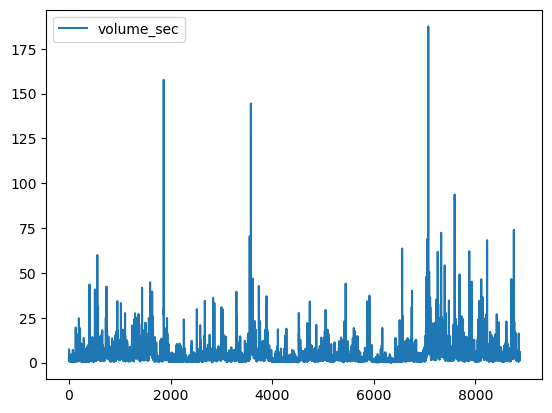

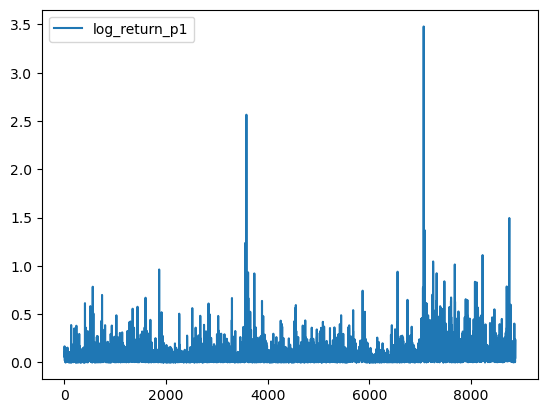

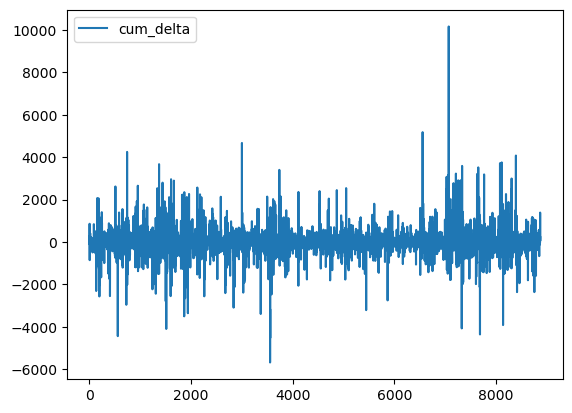

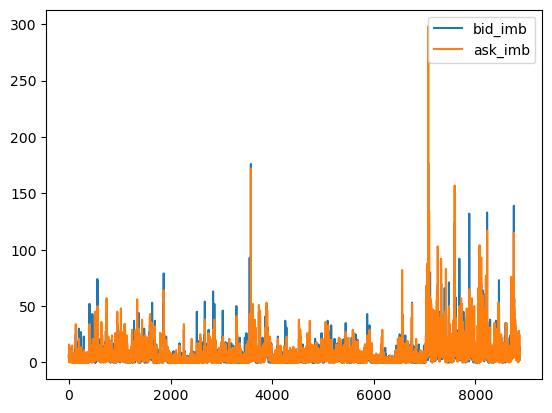

In [2]:
import matplotlib.pyplot as plt

data[["volume_sec"]].plot();
data[["log_return_p1"]].plot();
data[["cum_delta"]].plot();
data[["bid_imb","ask_imb"]].plot();

plt.show()

In [5]:
data.describe()
#data.corr()

,total_volume,bar_direction,cum_delta,bar_duration,volume_sec,bid_imb,ask_imb,price_sd,open_price,closing_price,price_mean,net_delta_t3,net_delta_t2,net_delta_t1,log_return_p1,log_bool
count,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000,8875.000000
mean,1271.803216,-0.007099,0.785038,300.725250,4.232875,6.368789,6.698817,0.736232,1364.668551,1364.695929,1364.680553,0.775946,0.782235,0.785038,0.088921,0.002592
std,1931.267226,1.000031,506.269201,2.804057,6.435942,8.616644,9.317104,0.733250,104.625482,104.648850,104.640608,506.267562,506.268044,506.269201,0.112700,0.050844
min,27.810000,-1.000000,-5686.850000,277.004000,0.090000,0.000000,0.000000,0.000000,1206.600000,1206.600000,1204.600000,-5686.850000,-5686.850000,-5686.850000,0.000000,0.000000
25%,409.430000,-1.000000,-137.985000,299.923000,1.360000,2.000000,2.000000,0.330000,1297.960000,1297.945000,1297.960000,-137.985000,-137.985000,-137.985000,0.026635,0.000000
50%,728.470000,-1.000000,-3.490000,300.368000,2.430000,4.000000,4.000000,0.550000,1323.130000,1323.120000,1323.080000,-3.490000,-3.490000,-3.490000,0.058400,0.000000
75%,1431.410000,1.000000,130.865000,301.528500,4.770000,8.000000,8.000000,0.890000,1357.500000,1357.515000,1357.295000,130.865000,130.865000,130.865000,0.112575,0.000000
max,56210.850000,1.000000,10164.070000,325.220000,187.380000,177.000000,298.000000,22.620000,1649.310000,1649.310000,1649.610000,10164.070000,10164.070000,10164.070000,3.478380,1.000000


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier

import os
import pickle
import numpy as np


filename = 'finalized_model.sav'

# Grab our X & Y Columns.
X_Cols = data[["total_volume","cum_delta","bar_duration","volume_sec","bid_imb","ask_imb","price_sd","net_delta_t3","net_delta_t2"]]
Y_Cols = data["log_bool"]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 50)

rand_frst_clf = SGDClassifier(loss='log')

#rand_frst_clf = RandomForestClassifier(warm_start=True,n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

if os.path.exists('finalized_model.sav'):
    print ("Trained model already pickled -- >")
    with open('finalized_model.sav', 'rb') as f:
        rand_frst_clf = pickle.load(f)
        rand_frst_clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
else:
    print ("New model training -- >")
    rand_frst_clf.partial_fit(X_train, y_train, classes=np.unique(y_train))

y_pred = rand_frst_clf.predict(X_test)
print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(X_test), normalize = True) * 100.0)

#a = [[4590.03,-397.01,298.55119,15.37,15,15,1.41,-89.26,-81.12]]
#a = [[1753.64,26.69,300.865,5.83,9,3,1.24,-54.20,873.29]]
#y_pred = rand_frst_clf.predict_proba(a)
#print(y_pred)

for i in range(len(X_test)):
    print("X=%s, Predicted=%s" % (X_test.iloc[i], y_pred[i]))
    
# save the model to disk
#pickle.dump(rand_frst_clf, open(filename, 'wb'))
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)


#y_pred = rand_frst_clf.predict([[540.16,1,79.14,59.786,9.03,4,1,1.21,1179.89,109.86,-1818.58,79.14]])


# Define the traget names
#target_names = ['log_bool']

# Build a classifcation report
#report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
#report_df = pd.DataFrame(report).transpose()
#report_df


C:\Users\Piotr\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


New model training -- >
Correct Prediction (%):  28.030644434429924
X=total_volume    289.930
cum_delta        70.670
bar_duration    297.894
volume_sec        0.970
bid_imb           3.000
ask_imb           1.000
price_sd          0.300
net_delta_t3    282.920
net_delta_t2   -110.800
Name: 4226, dtype: float64, Predicted=1
X=total_volume    2082.420
cum_delta       -902.970
bar_duration     299.305
volume_sec         6.960
bid_imb            3.000
ask_imb            4.000
price_sd           0.400
net_delta_t3   -2007.440
net_delta_t2    -248.300
Name: 1303, dtype: float64, Predicted=1
X=total_volume    191.310
cum_delta       -62.020
bar_duration    291.602
volume_sec        0.660
bid_imb           3.000
ask_imb           0.000
price_sd          0.430
net_delta_t3    -47.830
net_delta_t2    -38.320
Name: 4266, dtype: float64, Predicted=0
X=total_volume    572.360
cum_delta       -16.650
bar_duration    299.575
volume_sec        1.910
bid_imb           5.000
ask_imb           2.000
pri

C:\Users\Piotr\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


X=total_volume    3114.930
cum_delta       -201.880
bar_duration     300.052
volume_sec        10.380
bid_imb           11.000
ask_imb            5.000
price_sd           1.300
net_delta_t3     635.630
net_delta_t2    -812.780
Name: 6750, dtype: float64, Predicted=1
X=total_volume    11236.540
cum_delta        1439.020
bar_duration      300.941
volume_sec         37.340
bid_imb            33.000
ask_imb            28.000
price_sd            2.340
net_delta_t3      744.650
net_delta_t2      840.140
Name: 5915, dtype: float64, Predicted=1
X=total_volume    116.820
cum_delta        11.150
bar_duration    304.678
volume_sec        0.380
bid_imb           1.000
ask_imb           2.000
price_sd          0.170
net_delta_t3   -155.670
net_delta_t2     71.450
Name: 4208, dtype: float64, Predicted=0
X=total_volume    307.170
cum_delta         7.220
bar_duration    299.854
volume_sec        1.020
bid_imb           0.000
ask_imb           1.000
price_sd          0.280
net_delta_t3     46.220
net_d

X=total_volume    972.290
cum_delta       376.790
bar_duration    303.612
volume_sec        3.200
bid_imb           6.000
ask_imb           6.000
price_sd          0.550
net_delta_t3   -124.480
net_delta_t2   -139.170
Name: 3156, dtype: float64, Predicted=1
X=total_volume    498.130
cum_delta       -58.830
bar_duration    300.771
volume_sec        1.660
bid_imb           5.000
ask_imb           3.000
price_sd          0.640
net_delta_t3     73.050
net_delta_t2   -163.900
Name: 4770, dtype: float64, Predicted=1
X=total_volume    2102.960
cum_delta         74.180
bar_duration     300.084
volume_sec         7.010
bid_imb            9.000
ask_imb           10.000
price_sd           1.450
net_delta_t3     268.780
net_delta_t2    -597.480
Name: 7070, dtype: float64, Predicted=1
X=total_volume    899.660
cum_delta       -13.210
bar_duration    301.106
volume_sec        2.990
bid_imb           4.000
ask_imb          13.000
price_sd          0.900
net_delta_t3    166.210
net_delta_t2    433.860

X=total_volume    669.140
cum_delta        48.060
bar_duration    299.953
volume_sec        2.230
bid_imb           6.000
ask_imb           4.000
price_sd          0.220
net_delta_t3    409.200
net_delta_t2     99.600
Name: 1219, dtype: float64, Predicted=1
X=total_volume    398.53
cum_delta       -82.54
bar_duration    302.59
volume_sec        1.32
bid_imb           4.00
ask_imb           1.00
price_sd          0.45
net_delta_t3    -20.27
net_delta_t2    160.29
Name: 5834, dtype: float64, Predicted=1
X=total_volume    802.510
cum_delta        17.370
bar_duration    300.832
volume_sec        2.670
bid_imb           2.000
ask_imb           4.000
price_sd          0.430
net_delta_t3     18.880
net_delta_t2    618.520
Name: 5246, dtype: float64, Predicted=1
X=total_volume     70.880
cum_delta        32.330
bar_duration    305.393
volume_sec        0.230
bid_imb           0.000
ask_imb           0.000
price_sd          0.220
net_delta_t3    -58.970
net_delta_t2   -159.910
Name: 4363, dtype

X=total_volume    512.220
cum_delta        56.920
bar_duration    300.064
volume_sec        1.710
bid_imb           6.000
ask_imb           2.000
price_sd          0.440
net_delta_t3   -547.500
net_delta_t2    199.380
Name: 7516, dtype: float64, Predicted=1
X=total_volume    509.850
cum_delta      -201.170
bar_duration    300.595
volume_sec        1.700
bid_imb           4.000
ask_imb           3.000
price_sd          0.400
net_delta_t3    344.460
net_delta_t2    -53.520
Name: 4993, dtype: float64, Predicted=1
X=total_volume    217.31
cum_delta        68.56
bar_duration    302.77
volume_sec        0.72
bid_imb           0.00
ask_imb           0.00
price_sd          0.13
net_delta_t3      2.93
net_delta_t2     -4.95
Name: 3209, dtype: float64, Predicted=1
X=total_volume    1252.810
cum_delta       -325.270
bar_duration     299.764
volume_sec         4.180
bid_imb            7.000
ask_imb            9.000
price_sd           1.250
net_delta_t3     517.100
net_delta_t2     269.660
Name: 65

In [156]:
importance = rand_frst_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


AttributeError: 'SGDClassifier' object has no attribute 'feature_importances_'

In [3]:
# first neural network with keras tutorial
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import sklearn as sk
import pandas as pd

COLUMNS = ["total_volume","cum_delta","bar_duration","volume_sec","bid_imb","ask_imb","price_sd","net_delta_t3","net_delta_t2"]

X_Cols = data[COLUMNS]
Y_Cols = data["log_bool"]

train_size = int(len(X_Cols) * .95)
test_size = len(X_Cols) - train_size

train_x,test_x = X_Cols.iloc[0:train_size],X_Cols.iloc[0:test_size]
train_y,test_y = Y_Cols.iloc[0:train_size],Y_Cols.iloc[0:test_size]

#train_x, test_x, train_y, test_y = sk.model_selection.train_test_split(X_Cols, Y_Cols, random_state = 50)

print(train_x.shape,train_y.shape)
print(train_y.dtypes)

model = keras.Sequential()
model.add(keras.layers.Dense(12, input_shape=(9,), activation='relu'))
model.add(keras.layers.Dense(9, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(train_x, train_y, epochs=1000, batch_size=10)

_, accuracy = model.evaluate(test_x, test_y)
print('Accuracy: %.2f' % (accuracy*100))


(8431, 9) (8431,)
int64
Epoch 1/1000
844/844 [==============================] - 1s 846us/step - loss: 19.3606 - accuracy: 0.6354
Epoch 2/1000
844/844 [==============================] - 1s 812us/step - loss: 1.5981 - accuracy: 0.7036
Epoch 3/1000
844/844 [==============================] - 1s 824us/step - loss: 1.2131 - accuracy: 0.7155
Epoch 4/1000
844/844 [==============================] - 1s 797us/step - loss: 0.9873 - accuracy: 0.7260
Epoch 5/1000
844/844 [==============================] - 1s 781us/step - loss: 0.8478 - accuracy: 0.7404
Epoch 6/1000
844/844 [==============================] - 1s 791us/step - loss: 0.8569 - accuracy: 0.7399
Epoch 7/1000
844/844 [==============================] - 1s 795us/step - loss: 0.9082 - accuracy: 0.7415
Epoch 8/1000
844/844 [==============================] - 1s 767us/step - loss: 0.8612 - accuracy: 0.7495
Epoch 9/1000
844/844 [==============================] - 1s 795us/step - loss: 0.7335 - accuracy: 0.7547
Epoch 10/1000
844/844 [================

844/844 [==============================] - 1s 809us/step - loss: 0.4579 - accuracy: 0.7953
Epoch 156/1000
844/844 [==============================] - 1s 786us/step - loss: 0.4591 - accuracy: 0.7926
Epoch 157/1000
844/844 [==============================] - 1s 758us/step - loss: 0.4607 - accuracy: 0.7928
Epoch 158/1000
844/844 [==============================] - 1s 793us/step - loss: 0.4559 - accuracy: 0.7956
Epoch 159/1000
844/844 [==============================] - 1s 790us/step - loss: 0.4570 - accuracy: 0.7973
Epoch 160/1000
844/844 [==============================] - 1s 775us/step - loss: 0.4594 - accuracy: 0.7943
Epoch 161/1000
844/844 [==============================] - 1s 806us/step - loss: 0.4582 - accuracy: 0.7942
Epoch 162/1000
844/844 [==============================] - 1s 742us/step - loss: 0.4622 - accuracy: 0.7930
Epoch 163/1000
844/844 [==============================] - 1s 725us/step - loss: 0.4596 - accuracy: 0.7949
Epoch 164/1000
844/844 [==============================] - 1s 

844/844 [==============================] - 1s 784us/step - loss: 0.4527 - accuracy: 0.7944
Epoch 310/1000
844/844 [==============================] - 1s 806us/step - loss: 0.4569 - accuracy: 0.7950
Epoch 311/1000
844/844 [==============================] - 1s 789us/step - loss: 0.4587 - accuracy: 0.7954
Epoch 312/1000
844/844 [==============================] - 1s 776us/step - loss: 0.4544 - accuracy: 0.7972
Epoch 313/1000
844/844 [==============================] - 1s 791us/step - loss: 0.4615 - accuracy: 0.7961
Epoch 314/1000
844/844 [==============================] - 1s 815us/step - loss: 0.4559 - accuracy: 0.7943
Epoch 315/1000
844/844 [==============================] - 1s 789us/step - loss: 0.4542 - accuracy: 0.7961
Epoch 316/1000
844/844 [==============================] - 1s 809us/step - loss: 0.4559 - accuracy: 0.7973
Epoch 317/1000
844/844 [==============================] - 1s 789us/step - loss: 0.4555 - accuracy: 0.7954
Epoch 318/1000
844/844 [==============================] - 1s 

844/844 [==============================] - 1s 848us/step - loss: 0.4567 - accuracy: 0.7940
Epoch 464/1000
844/844 [==============================] - 1s 869us/step - loss: 0.4547 - accuracy: 0.7947
Epoch 465/1000
844/844 [==============================] - 1s 878us/step - loss: 0.4549 - accuracy: 0.7969
Epoch 466/1000
844/844 [==============================] - 1s 850us/step - loss: 0.4561 - accuracy: 0.7943
Epoch 467/1000
844/844 [==============================] - 1s 921us/step - loss: 0.4551 - accuracy: 0.7947
Epoch 468/1000
844/844 [==============================] - 1s 897us/step - loss: 0.4532 - accuracy: 0.7958
Epoch 469/1000
844/844 [==============================] - 1s 874us/step - loss: 0.4559 - accuracy: 0.7953
Epoch 470/1000
844/844 [==============================] - 1s 914us/step - loss: 0.4540 - accuracy: 0.7961
Epoch 471/1000
844/844 [==============================] - 1s 925us/step - loss: 0.4559 - accuracy: 0.7944
Epoch 472/1000
844/844 [==============================] - 1s 

844/844 [==============================] - 1s 751us/step - loss: 0.4530 - accuracy: 0.7965
Epoch 618/1000
844/844 [==============================] - 1s 740us/step - loss: 0.4538 - accuracy: 0.7948
Epoch 619/1000
844/844 [==============================] - 1s 729us/step - loss: 0.4527 - accuracy: 0.7943
Epoch 620/1000
844/844 [==============================] - 1s 743us/step - loss: 0.4530 - accuracy: 0.7934
Epoch 621/1000
844/844 [==============================] - 1s 763us/step - loss: 0.4529 - accuracy: 0.7931
Epoch 622/1000
844/844 [==============================] - 1s 760us/step - loss: 0.4510 - accuracy: 0.7982
Epoch 623/1000
844/844 [==============================] - 1s 726us/step - loss: 0.4535 - accuracy: 0.7955
Epoch 624/1000
844/844 [==============================] - 1s 706us/step - loss: 0.4534 - accuracy: 0.7963
Epoch 625/1000
844/844 [==============================] - 1s 749us/step - loss: 0.4526 - accuracy: 0.7933
Epoch 626/1000
844/844 [==============================] - 1s 

844/844 [==============================] - 1s 766us/step - loss: 0.4535 - accuracy: 0.7952
Epoch 772/1000
844/844 [==============================] - 1s 756us/step - loss: 0.4519 - accuracy: 0.7982
Epoch 773/1000
844/844 [==============================] - 1s 740us/step - loss: 0.4509 - accuracy: 0.7973
Epoch 774/1000
844/844 [==============================] - 1s 756us/step - loss: 0.4506 - accuracy: 0.7974
Epoch 775/1000
844/844 [==============================] - 1s 778us/step - loss: 0.4531 - accuracy: 0.7950
Epoch 776/1000
844/844 [==============================] - 1s 778us/step - loss: 0.4529 - accuracy: 0.7944
Epoch 777/1000
844/844 [==============================] - 1s 872us/step - loss: 0.4535 - accuracy: 0.7935
Epoch 778/1000
844/844 [==============================] - 1s 853us/step - loss: 0.4497 - accuracy: 0.7986
Epoch 779/1000
844/844 [==============================] - 1s 791us/step - loss: 0.4506 - accuracy: 0.7967
Epoch 780/1000
844/844 [==============================] - 1s 

844/844 [==============================] - 1s 786us/step - loss: 0.4507 - accuracy: 0.7963
Epoch 926/1000
844/844 [==============================] - 1s 743us/step - loss: 0.4535 - accuracy: 0.7953
Epoch 927/1000
844/844 [==============================] - 1s 757us/step - loss: 0.4518 - accuracy: 0.7969
Epoch 928/1000
844/844 [==============================] - 1s 744us/step - loss: 0.4515 - accuracy: 0.7959
Epoch 929/1000
844/844 [==============================] - 1s 754us/step - loss: 0.4503 - accuracy: 0.7958
Epoch 930/1000
844/844 [==============================] - 1s 758us/step - loss: 0.4513 - accuracy: 0.7961
Epoch 931/1000
844/844 [==============================] - 1s 766us/step - loss: 0.4508 - accuracy: 0.7956
Epoch 932/1000
844/844 [==============================] - 1s 812us/step - loss: 0.4644 - accuracy: 0.7979
Epoch 933/1000
844/844 [==============================] - 1s 789us/step - loss: 0.4508 - accuracy: 0.7961
Epoch 934/1000
844/844 [==============================] - 1s 

In [8]:
#a = [[4590.03,-397.01,298.55119,15.37,15,15,1.41,-89.26,-81.12]]
#a = [[1753.64,26.69,300.865,5.83,9,3,1.24,-54.20,873.29]]
a = [[7820.31,-2181.35,300.047572,26.06,36,34,3.96,-397.01,-347.06]]

yhat = model.predict(a)

print(yhat[0][0])

#model.save("final_seq_nn.sav")
#for i in range(0,len(test_x)):
#    print(yhat[i], test_y[i])
    

1/1 [==============================] - 0s 28ms/step
0.1394845
